# Applied Machine Learning (2021), exercises


## General instructions for all exercises

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Do not change other areas of the document, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manualle graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks may be text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, download the whole notebook, using menu `File -> Download as -> Notebook (.ipynb)`. Save the file in your hard disk, and submit it in [Moodle](https://moodle.uwasa.fi) under the corresponding excercise.

Your solution should be an executable Python code. Use the code already existing as an example of Python programing and read more from the numerous Python programming material from the Internet if necessary. 


In [1]:
NAME = "LEON DARIO CORREA RAMIREZ"
Student_number = "e122676"

---

## Wine quality determination (Regression)
A chemical analysis was carried out for 1599 red wine samples, after which the quality of each sample was analyzed by experts in scale 0..10.

The chemical analaysis reveals 11 features for each wine sample, which are:
fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol (concentration). Each feature is a floating point value, and the quality is an integer between 0 to 10.  


## Task 1


### Read the data

- Read a CSV-file, called `winequality-red.csv`
- Separate 11 first columns and all rows to your design matrix X
- Use the last column, quality, as dependent variable (target)


### Make training set and test set
Separate your data X and y to training set (X_train, y_train) which contains 75% of the data and to the test set X_test, y_test which contains 25% of the data.

In [2]:
##>>> Some code for bootstrap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

# Read the data
df = pd.read_csv('winequality-red.csv',skipinitialspace=True)
df.head()

# Design matrix X
X = df.iloc[:,:-1]
X.head()

# Dependet variable (target) - quality column
y = df['quality']
y.head()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
## >> Some tests, do not change
assert(X_train.shape==(1199,11))
assert(X_test.shape==(400,11))

## Task 2

- Study the data, select a regression algorithm for predicting the quality of the wine, based on it's chemical features. You can assume that the quality is a floating point number.
- Train the regression algorithm using the training data.
- Use cross validation to test the performance of the regressor and tune it's parameters as good as you can
- Finally test the regressor with the test set
- Report the score (= $R^2$ = coefficient of determination) of the regressor in the training set, cross validation and in the test set
- Plot the predicted quality against the known quality 
- What does the $R^2$ score tells? 
- What is your opinion of the performance? Is there signs of overfitting?

Accurary in the training set..0.646592
Accurary in crossvalidation...0.387830
Accurary in the test set......0.401378

The R2 scores obtained indicate that the correlation between
 the real test data and the predicted values is relatively low
 hinting no signs of overfitting


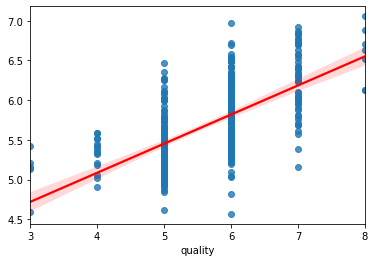

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
import seaborn as sns

# Pipeline 
predictor = Pipeline([
       #('Scaling', StandardScaler()),
       ('EN', GradientBoostingRegressor(max_features=11))
         ])
model = predictor.fit(X_train,y_train)

# Predicting using the test data
yh_test=predictor.predict(X_test)

# Cross Validation accuracy R2
cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()

# Training accuracy R2
train_score = model.score(X_train,y_train)

# Test accuracy R2
test_score = model.score(X_test, y_test)

# Plot the regression
sns.regplot(x=y_test,y=yh_test, line_kws={"color": "red"})


print("Accurary in the training set..%f" % train_score)
print("Accurary in crossvalidation...%f" % cv_score)
print("Accurary in the test set......%f" % test_score)

print()
print('The R2 scores obtained indicate that the correlation between\n the real test data and the predicted values is relatively low\n hinting no signs of overfitting')

In [12]:
### >>>> Some testing
# The coefficient of determination should be between 0.4 - 0.5 in the
# test set depending on your regression algorithm and parameters
assert(test_score>0.4), "Try again, if you can get better accuracy by tuning the regressor parameters"

## Task 3, Select the best features

Like it often is, some features are more important for regression than the others. 

- Study which features are the most important for predicting the quality. If you used Extratrees regressor or GradientBoostedTree regressor, then you can use the .feature_importances vector. Another option is to use LASSO or Elastic net models and SelectFromModel to reduce unimportant features.
- Plot a bar graph or stem plot to visualize the importance of features
- To check the importance of a single variable, plot a scatter plot using true quality in x-axis and the value of teh most important variable in y-axis.
- Make a vector `features` which contains the names of the three most important features in decreasing order

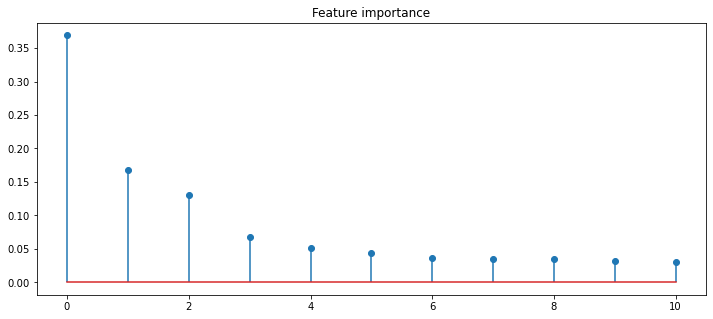

Most relevant features:
 ['alcohol', 'sulphates', 'volatile acidity']


,Feature Importance
alcohol,0.368925
sulphates,0.168494
volatile acidity,0.130417
total sulfur dioxide,0.067931
density,0.051664
fixed acidity,0.044046
residual sugar,0.035931
pH,0.035193
chlorides,0.034684
citric acid,0.032232


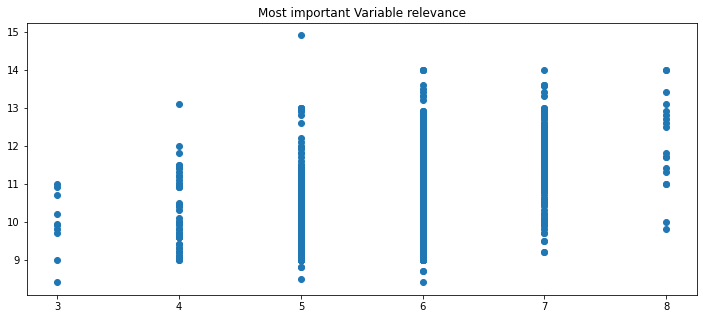

In [13]:
# Get features importance
est = GradientBoostingRegressor(max_features=11)

est.fit(X_train, y_train)

fl = []
fi = []
for i in range(len(X.columns)):
    #print("%2d %8s=%5.2f" % (i,X.columns[i], est.feature_importances_[i]))
    fl.append(X.columns[i])
    fi.append(est.feature_importances_[i])

fdf = pd.DataFrame(fi, fl, columns = ['Feature Importance'])

# Most relevant 3 features
MRF = fdf.nlargest(11, 'Feature Importance')

features = []
a = 0
for i in MRF.index:
    if a == 3:
        break
    features.append(i)
    a += 1

# Plot the features importance in descending order    
f = plt.figure(1, figsize=(12,5))
plt.title('Feature importance')
plt.stem(MRF.iloc[:,0])
plt.show()

# Plot the most important variable
g = plt.figure(2, figsize=(12,5))
plt.title('Most important Variable relevance')
plt.scatter(y, X[MRF.index[0]])

# Display the features importance in descending order
print('Most relevant features:\n', features)
MRF.head(11)


In [15]:
assert(len(features)==3), "Please put the names of three most important features in list features!"
